## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.



## 1) Detect chessboard corners from calibration images

../camera_cal/calibration1.jpg
../camera_cal/calibration10.jpg


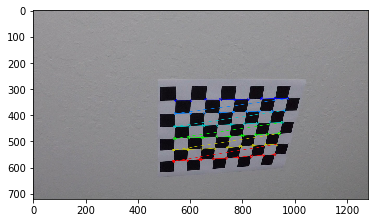

../camera_cal/calibration11.jpg


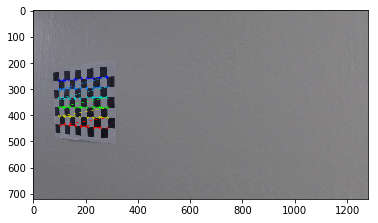

../camera_cal/calibration12.jpg


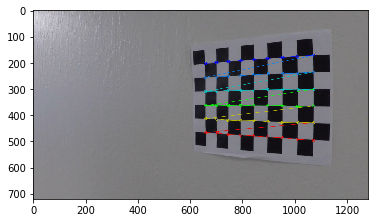

../camera_cal/calibration13.jpg


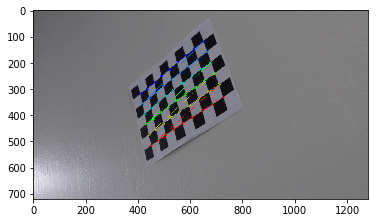

../camera_cal/calibration14.jpg


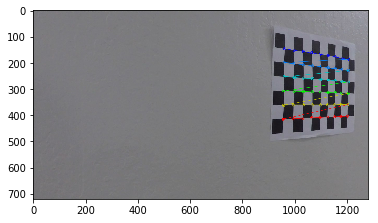

../camera_cal/calibration15.jpg


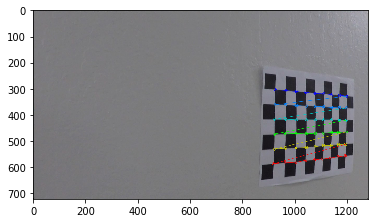

../camera_cal/calibration16.jpg


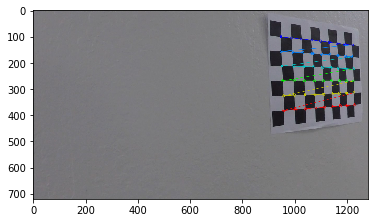

../camera_cal/calibration17.jpg


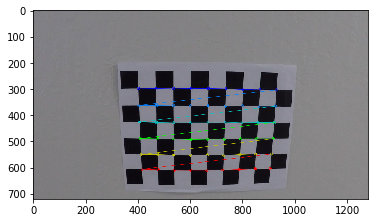

../camera_cal/calibration18.jpg


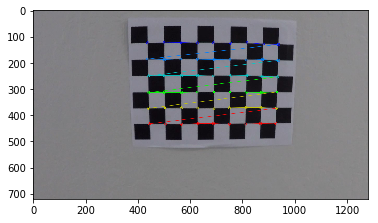

../camera_cal/calibration19.jpg


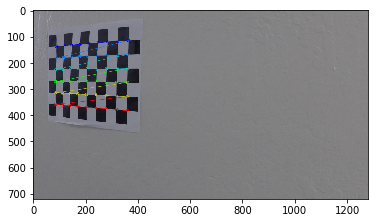

../camera_cal/calibration2.jpg


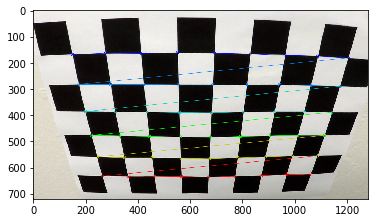

../camera_cal/calibration20.jpg


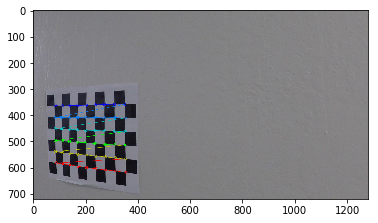

../camera_cal/calibration3.jpg


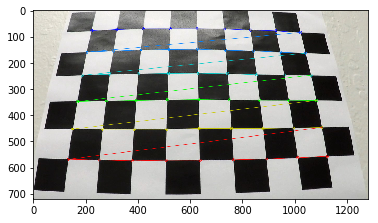

../camera_cal/calibration4.jpg
../camera_cal/calibration5.jpg
../camera_cal/calibration6.jpg


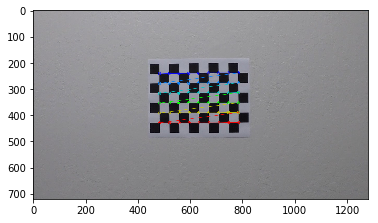

../camera_cal/calibration7.jpg


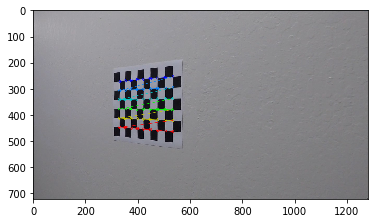

../camera_cal/calibration8.jpg


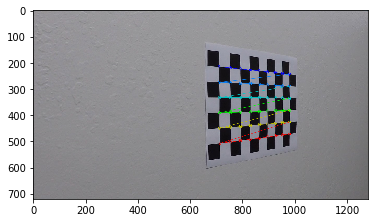

../camera_cal/calibration9.jpg


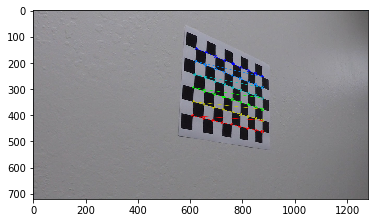

In [1]:
%run 'imports.py'

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        
    # If found, add object points, image points
    if ret == True:
        print(fname)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        plt.imshow(img)
        plt.show()
    else:
        print(fname)

chessboard_corners = {}
chessboard_corners["objpoints"] = objpoints
chessboard_corners["imgpoints"] = imgpoints
pickle.dump(chessboard_corners, open("./chessboard_corners.p", "wb"))

## 2) Compute the camera calibration matrix and distortion coefficients

0 ../camera_cal/calibration1.jpg


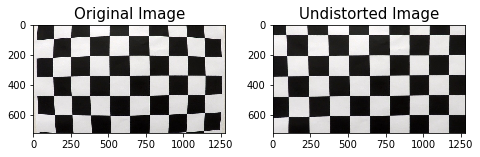

1 ../camera_cal/calibration10.jpg


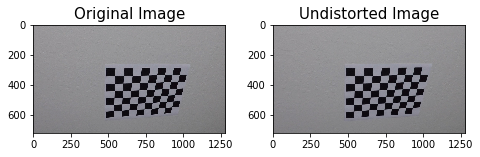

2 ../camera_cal/calibration11.jpg


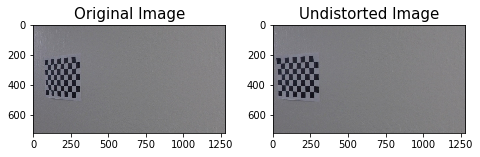

3 ../camera_cal/calibration12.jpg


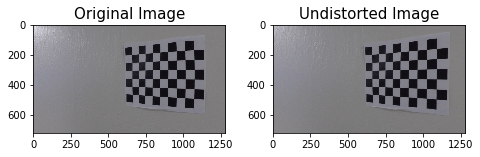

4 ../camera_cal/calibration13.jpg


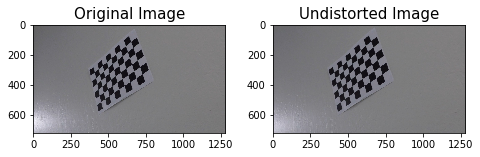

5 ../camera_cal/calibration14.jpg


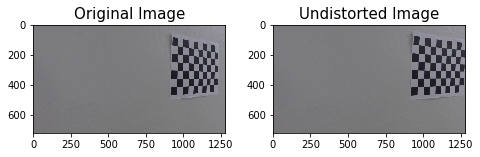

6 ../camera_cal/calibration15.jpg


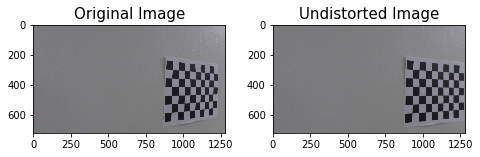

7 ../camera_cal/calibration16.jpg


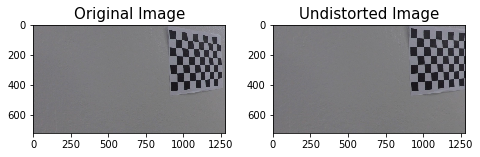

8 ../camera_cal/calibration17.jpg


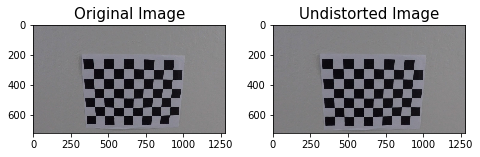

9 ../camera_cal/calibration18.jpg


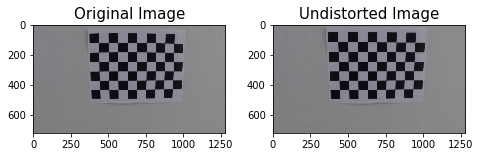

10 ../camera_cal/calibration19.jpg


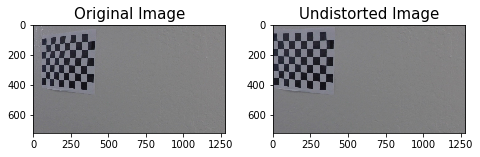

11 ../camera_cal/calibration2.jpg


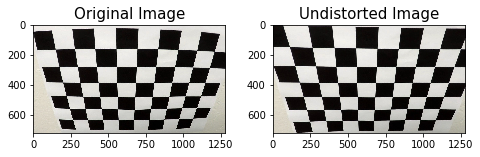

12 ../camera_cal/calibration20.jpg


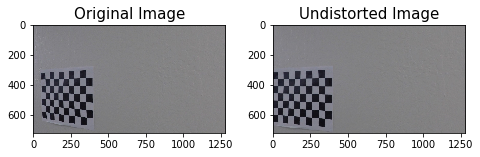

13 ../camera_cal/calibration3.jpg


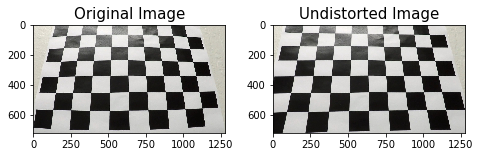

14 ../camera_cal/calibration4.jpg


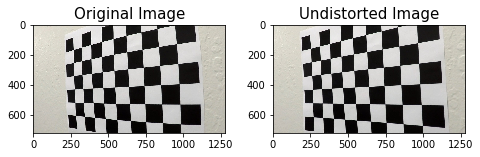

15 ../camera_cal/calibration5.jpg


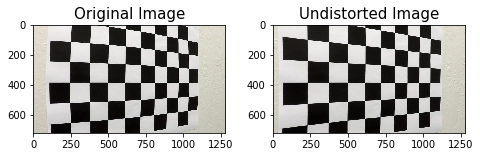

16 ../camera_cal/calibration6.jpg


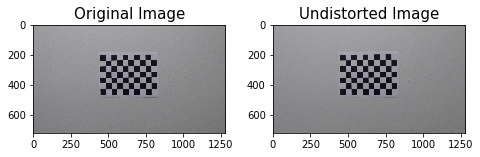

17 ../camera_cal/calibration7.jpg


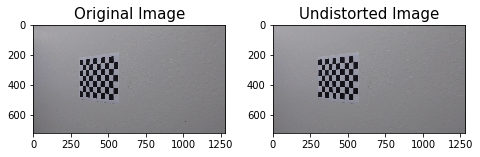

18 ../camera_cal/calibration8.jpg


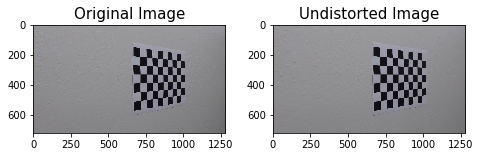

19 ../camera_cal/calibration9.jpg


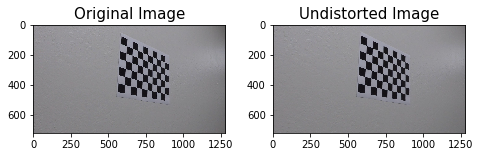

In [11]:
%run 'imports.py'
%run 'testbed_misc.py'

chessboard_corners = pickle.load( open( "chessboard_corners.p", "rb" ) )
objpoints = chessboard_corners["objpoints"]
imgpoints = chessboard_corners["imgpoints"]

# Step through the list and search for chessboard corners
images = glob.glob('../camera_cal/calibration*.jpg')
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    
    if idx == 0:
        undistorted = cal_undistort(img, objpoints, imgpoints)
    else:
        undistorted = cal_undistort(img)

    print(idx, fname)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=15)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
    if idx == 0:
        path = '../output_images/'
        filename = fname.split('/')[-1]
        mpimg.imsave(path+'undist_'+filename, undistorted)
        


## 3) Apply a distortion correction to raw images

../test_images/test1.jpg


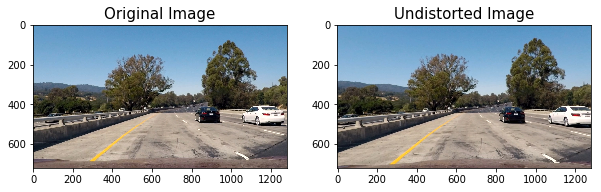

../test_images/test2.jpg


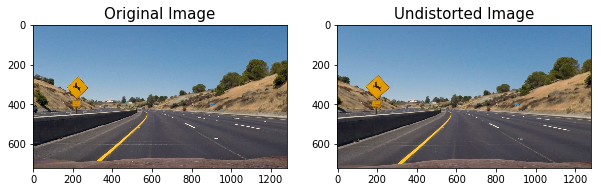

../test_images/test3.jpg


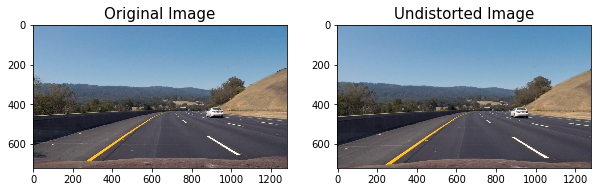

../test_images/test4.jpg


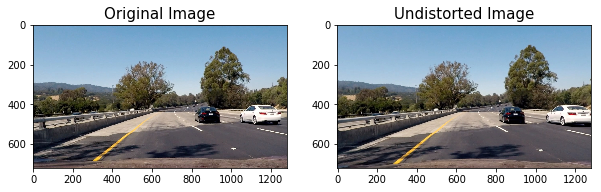

../test_images/test5.jpg


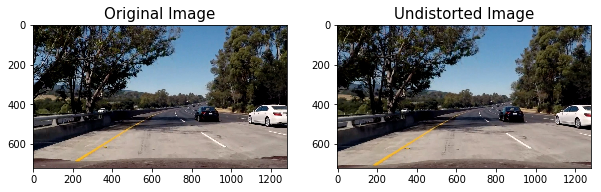

../test_images/test6.jpg


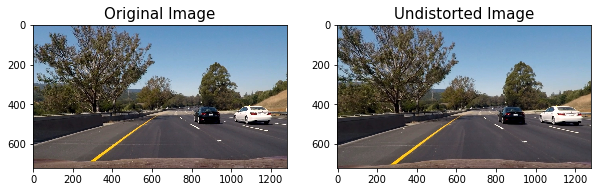

In [12]:
%run 'imports.py'
%run 'testbed_misc.py'

images = glob.glob('../test_images/test*.jpg')

camera_calibration = pickle.load( open( "camera_calibration.p", "rb" ) )
mtx = camera_calibration["mtx"]
dist = camera_calibration["dist"]

for idx, fname in enumerate(images):
    print(fname)
    
    img = mpimg.imread(fname)    
    undistorted = cal_undistort(img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize = 15)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize = 15)
    
    if idx == 0:
        path = '../output_images/'
        filename = fname.split('/')[-1]
        mpimg.imsave(path+'undist_'+filename, undistorted)
    
    plt.show()

## 4) Create a thresholded binary image

../test_images/test1.jpg


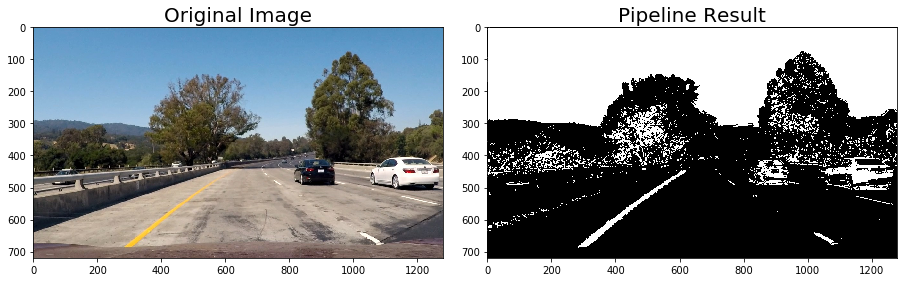

../test_images/test2.jpg


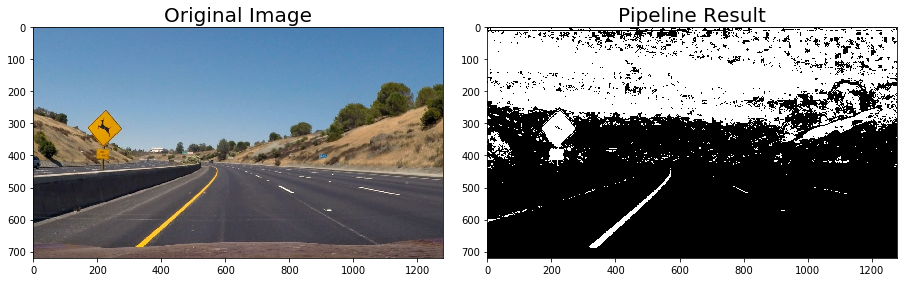

../test_images/test3.jpg


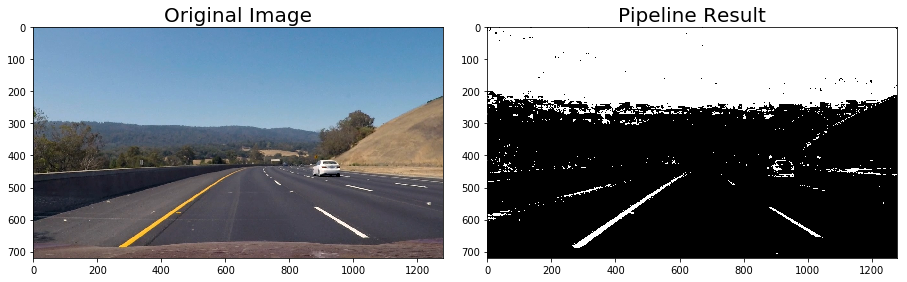

../test_images/test4.jpg


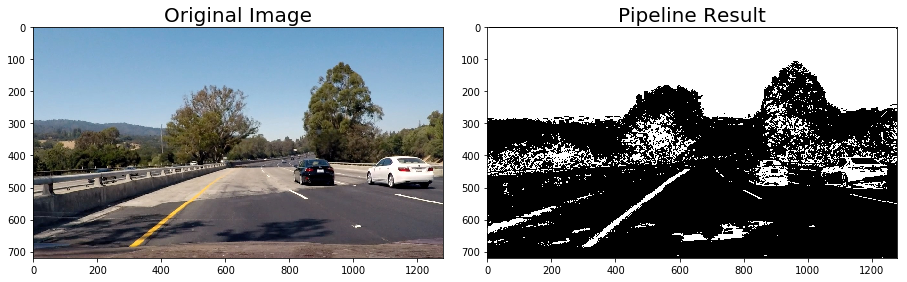

../test_images/test5.jpg


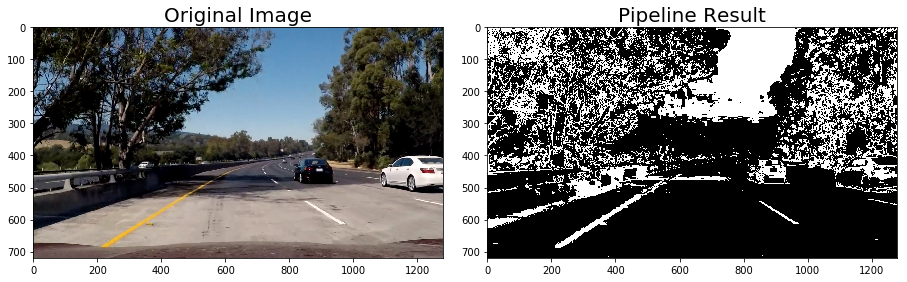

../test_images/test6.jpg


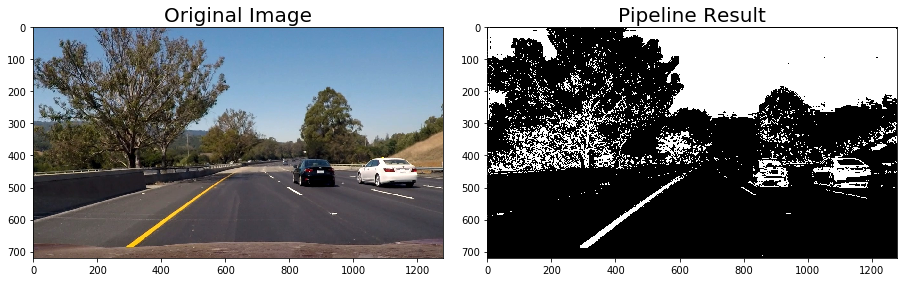

In [15]:
%run 'imports.py'
%run 'testbed_misc.py'

images = glob.glob('../test_images/test*.jpg')
debug = False
for idx, fname in enumerate(images):
    if debug:
        if idx > 0:
            continue
        print(fname)
        image = mpimg.imread(fname)
        result, _x, _y, _mag, _dir, sic_image = threshold_pipeline(image, Settings.thresholds, ksize=23, debug=True)

        font_size = 10
        f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 9))
        f.tight_layout()
        ax1.imshow(sic_image)
        ax1.set_title('Original Image', fontsize=font_size)
        ax2.imshow(_x, cmap='gray')
        ax2.set_title('GradX Result', fontsize=font_size)
        ax3.imshow(_y, cmap='gray')
        ax3.set_title('GradY', fontsize=font_size)
        ax4.imshow(_mag, cmap='gray')
        ax4.set_title('GradMag', fontsize=font_size)
        ax5.imshow(_dir, cmap='gray')
        ax5.set_title('GradDir', fontsize=font_size)
        ax6.imshow(result, cmap='gray')
        ax6.set_title('GradCombo', fontsize=font_size)
        plt.show()
    else:
        print(fname)
        image = mpimg.imread(fname)
        result = threshold_pipeline(image, Settings.thresholds, ksize=23, debug=False)

        # Plot the result
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))
        f.subplots_adjust(hspace=0.3)
        f.tight_layout()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(result, cmap='gray')
        ax2.set_title('Pipeline Result', fontsize=20)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        plt.show()
        
        if idx == 0:
            path = '../output_images/'
            filename = fname.split('/')[-1]
            mpimg.imsave(path+'threshold_'+filename, result, cmap='gray')

## 5) Apply perspective transform

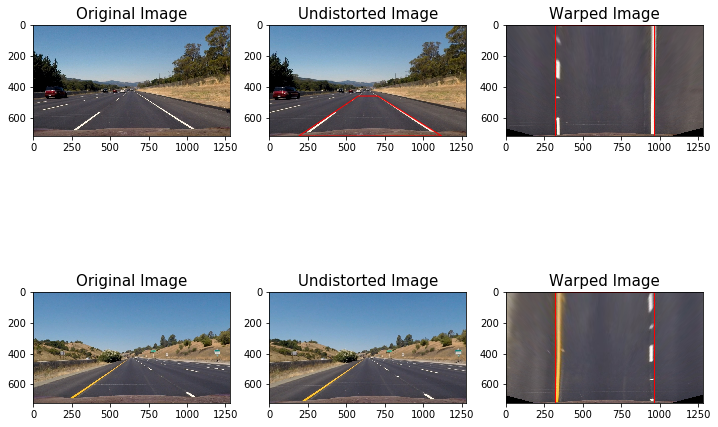

In [30]:
%run 'imports.py'
%run 'testbed_misc.py'

images = glob.glob('../test_images/straight_lines*.jpg')
img = mpimg.imread(images[1])
img_undist = cal_undistort(img)
img_warp, _, _ = warp_image(img_undist, Settings.src, Settings.dst)
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 9))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=15)
ax3.imshow(img_warp)
ax3.set_title('Warped Image', fontsize=15)

# Draw Polygon Lines
ax2.add_patch(patches.Polygon(xy=[src[0],src[1],src[3],src[2]], fill=False, edgecolor='r'))
ax3.add_patch(patches.Polygon(xy=[dst[0],dst[1],dst[3],dst[2]], fill=False, edgecolor='r'))

img = mpimg.imread(images[0])
img_undist = cal_undistort(img)
img_warp, _, _ = warp_image(img_undist)
ax4.imshow(img)
ax4.set_title('Original Image', fontsize=15)
ax5.imshow(img_undist)
ax5.set_title('Undistorted Image', fontsize=15)
ax6.imshow(img_warp)
ax6.set_title('Warped Image', fontsize=15)

# Draw Polygon Lines
ax6.add_patch(patches.Polygon(xy=[dst[0],dst[1],dst[3],dst[2]], fill=False, edgecolor='r'))

plt.show()

../test_images/test1.jpg


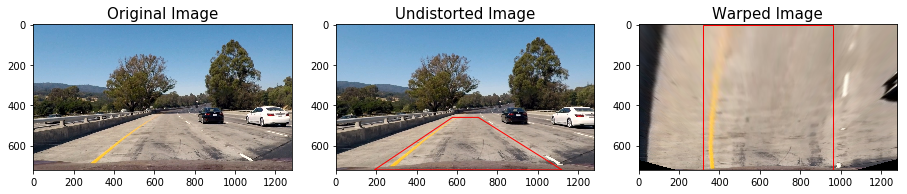

../test_images/test2.jpg


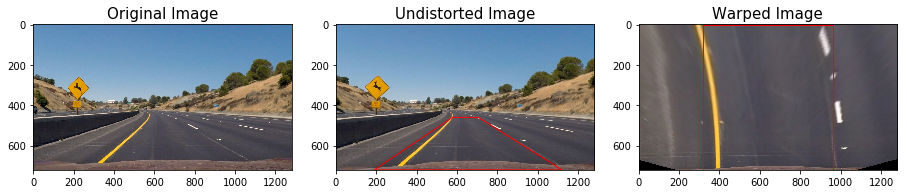

../test_images/test3.jpg


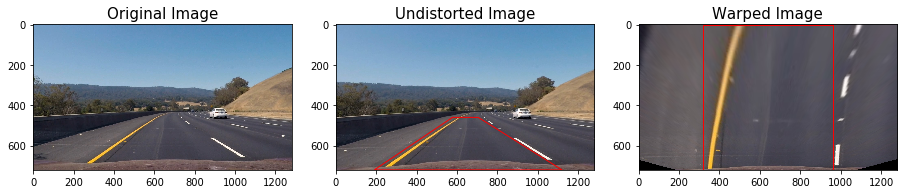

../test_images/test4.jpg


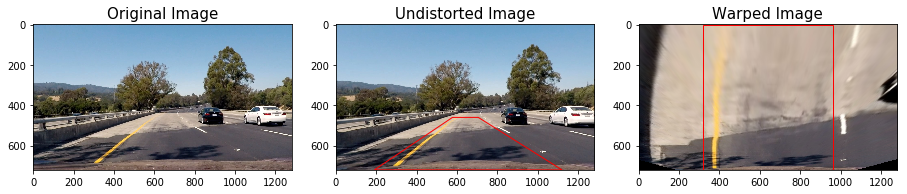

../test_images/test5.jpg


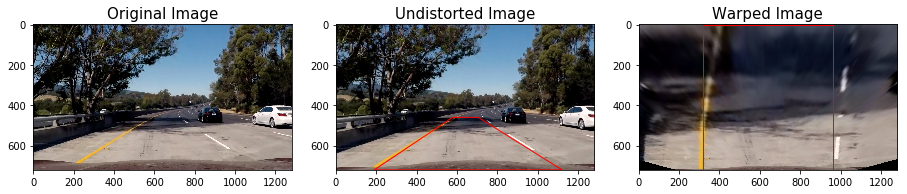

../test_images/test6.jpg


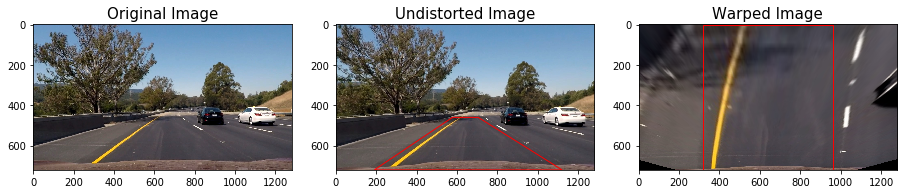

In [29]:
images = glob.glob('../test_images/test*.jpg')
for idx, fname in enumerate(images):
    print(fname)
    img = mpimg.imread(fname)
    img_undist = cal_undistort(img)
    img_warp, _, _ = warp_image(img_undist)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 9))
    #f.subplots_adjust(hspace=0.3)
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=15)
    ax2.imshow(img_undist)
    ax2.set_title('Undistorted Image', fontsize=15)
    ax3.imshow(img_warp)
    ax3.set_title('Warped Image', fontsize=15)
    
    # Draw Polygon Lines
    ax2.add_patch(patches.Polygon(xy=[src[0],src[1],src[3],src[2]], fill=False, edgecolor='r'))
    ax3.add_patch(patches.Polygon(xy=[dst[0],dst[1],dst[3],dst[2]], fill=False, edgecolor='r'))
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
        
    if idx == 0:
        path = '../output_images/'
        filename = fname.split('/')[-1]
        mpimg.imsave(path+'src_pts_'+filename, img_undist)
        mpimg.imsave(path+'dst_pts_'+filename, img_warp)
